In [2]:
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

In [3]:
mat_o1=89.0252463054187
D1=2205.981725396757
Ds1=2521.12197188201
sko1=46.96787972004653
As1=0.9958310033864437
Ex1=1.4599330674149877
moda1=84.9702380952381
mediana1=84.72727272727273
k_var1=52.75793291142822

In [4]:
mat_o2=12.862068965517242
D2=10.843043995243757
Ds2=10.937331334332836
sko2=3.292877768038734
As2=0.3594536838811182
Ex2=0.14949465981239607
moda2=12.34375
mediana2=12.627906976744185
k_var2=25.60146253971134

In [5]:
list={'№':['Price', 'Diameter'],'Mean':[mat_o1,mat_o2], 'Var':[D1,D2], 'Sko':[sko1,sko2], 'As': [As1, As2],'Ex': [Ex1, Ex2], 'Moda':[moda1, moda2],
     'Mediana': [mediana1, mediana2], 'KV':[k_var1, k_var2]}
tab=pd.DataFrame(list)
tab

,№,Mean,Var,Sko,As,Ex,Moda,Mediana,KV
0,Price,89.025246,2205.981725,46.967880,0.995831,1.459933,84.970238,84.727273,52.757933
1,Diameter,12.862069,10.843044,3.292878,0.359454,0.149495,12.343750,12.627907,25.601463


In [6]:
m_intP=[16, 24, 44, 16, 9, 3, 2, 2]
m_intD=[23, 0, 43, 22, 17, 7, 1, 3] 


In [7]:
df=pd.read_csv('Выборка Блохина.csv', delimiter=';')
viborka=[(df["The diameter of pizza in inch"]), (df["pizzaPrice_rupiah"])]
vi=pd.DataFrame(viborka)



In [8]:
interval_y=[7.464285714285715, 39.535714285714285, 71.60714285714286, 103.67857142857143, 135.75, 167.82142857142856, 199.8928571428571, 231.96428571428567, 264.0357142857142]
interval_x=[7.0, 9.0, 11.0, 13.0, 15.0, 17.0, 19.0, 21.0, 23.0]
m_xy=[]
df_price=sorted((df["pizzaPrice_rupiah"]))
df_diameter=sorted(df["The diameter of pizza in inch"])
count_mxy=0
for i in range (1,len(interval_x)):
    for j in range (1,len(interval_y)):
        for n in range (0,len(df_price)):
            if df_diameter[n]>interval_x[i-1] and df_diameter[n]<=interval_x[i] and df_price[n]>interval_y[j-1] and df_price[n]<=interval_y[j]:
                count_mxy+=1
        
        m_xy.append(count_mxy)
        count_mxy=0
    #m_xy.append('|')

    
print(m_xy)              
    

[16, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 26, 0, 0, 0, 0, 0, 0, 0, 18, 4, 0, 0, 0, 0, 0, 0, 0, 12, 5, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2]


In [9]:
M_xy=np.reshape(m_xy, (8, 8), order='F')
list={' ':['7.0; 9.0', '9.0; 11.0','11.0; 13.0','13.0; 15.0', '15.0; 17.0','17.0; 19.0','19.0; 21.0','21.0; 23.0'],
      '7.46; 39.54':M_xy[0],'39.54; 71.61':M_xy[1], '71.61; 103.68':M_xy[2],'103.68; 135.75':M_xy[3], '135.75; 167.82':M_xy[4], '167.82; 199.89':M_xy[5],
      '199.89; 231.96':M_xy[6], '231.96;264.06':M_xy[7]}
tab_int=pd.DataFrame(list)
tab_int

,,7.46; 39.54,39.54; 71.61,71.61; 103.68,103.68; 135.75,135.75; 167.82,167.82; 199.89,199.89; 231.96,231.96;264.06
0,7.0; 9.0,16,7,0,0,0,0,0,0
1,9.0; 11.0,0,0,0,0,0,0,0,0
2,11.0; 13.0,0,17,26,0,0,0,0,0
3,13.0; 15.0,0,0,18,4,0,0,0,0
4,15.0; 17.0,0,0,0,12,5,0,0,0
5,17.0; 19.0,0,0,0,0,4,3,0,0
6,19.0; 21.0,0,0,0,0,0,0,1,0
7,21.0; 23.0,0,0,0,0,0,0,1,2


In [10]:
count=0
countMx=[]
countMy=[0,0,0,0,0,0,0,0]
j=0
for i in range(len(m_xy)):
    if j<8:
        count+=m_xy[i]
        j+=1
        countMy[j-1]+=m_xy[i]
    else:
        countMx.append(count)
        count=0
        count+=m_xy[i]
        j=1
        countMy[j]+=m_xy[i] 
countMx.append(count)
countMx.append(116)
countMx



[23, 0, 43, 22, 17, 7, 1, 3, 116]

In [11]:
for i in range(8): 
    m_xy.append(countMy[i])
print(m_xy)

[16, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 26, 0, 0, 0, 0, 0, 0, 0, 18, 4, 0, 0, 0, 0, 0, 0, 0, 12, 5, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 16, 24, 44, 16, 9, 3, 2, 2]


In [12]:
M_xy=np.reshape(m_xy, (8, 9), order='F')
list={' ':['7.0; 9.0', '9.0; 11.0','11.0; 13.0','13.0; 15.0', '15.0; 17.0','17.0; 19.0','19.0; 21.0','21.0; 23.0','m_yj'],
      '7.46; 39.54':M_xy[0],'39.54; 71.61':M_xy[1], '71.61; 103.68':M_xy[2],'103.68; 135.75':M_xy[3], '135.75; 167.82':M_xy[4], '167.82; 199.89':M_xy[5],
      '199.89; 231.96':M_xy[6], '231.96;264.06':M_xy[7], 'm_xi':countMx}
tab_int=pd.DataFrame(list)
tab_int


,,7.46; 39.54,39.54; 71.61,71.61; 103.68,103.68; 135.75,135.75; 167.82,167.82; 199.89,199.89; 231.96,231.96;264.06,m_xi
0,7.0; 9.0,16,7,0,0,0,0,0,0,23
1,9.0; 11.0,0,0,0,0,0,0,0,0,0
2,11.0; 13.0,0,17,26,0,0,0,0,0,43
3,13.0; 15.0,0,0,18,4,0,0,0,0,22
4,15.0; 17.0,0,0,0,12,5,0,0,0,17
5,17.0; 19.0,0,0,0,0,4,3,0,0,7
6,19.0; 21.0,0,0,0,0,0,0,1,0,1
7,21.0; 23.0,0,0,0,0,0,0,1,2,3
8,m_yj,16,24,44,16,9,3,2,2,116


In [13]:
M_xy[2][3]

18

In [14]:
mid_x=[8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0]
mid_y=[23.5, 55.57142857142857, 87.64285714285714, 119.71428571428572, 151.78571428571428, 183.85714285714283, 215.9285714285714, 247.99999999999994]

In [15]:
n_xy=0
for i in range(0,len(mid_x)):
    for j in range(0,len(mid_y)):
        n_xy+=mid_x[i]*mid_y[j]*M_xy[j][i]
Sxy=n_xy/116-(mat_o1*mat_o2)
r_v=Sxy/((math.sqrt(Ds1))*(math.sqrt(Ds2)))

print('Cтатистическая оценка корреляционного момента ',Sxy,'\nКоэффициент корреляции:', r_v)

Cтатистическая оценка корреляционного момента  144.23562510616625 
Коэффициент корреляции: 0.8686002059704103


In [16]:
n=116
t1=stats.t.ppf((1 + 0.95)/2, n-1)
t2=stats.t.ppf((1 + 0.99)/2, n-1)
z=0.5*math.log((1+r_v)/(1-r_v))
m=1/(math.sqrt(n-3))
z1=[z-t1*m,z+t1*m]
z2=[z-t2*m, z+t2*m]
print('Доверительный интервал при  уровне значимости 0.95:','( ',z1[0],";", z1[1],' )')
print('Доверительный интервал при  уровне значимости 0.99:','( ',z2[0],";", z2[1],' )')
m

Доверительный интервал при  уровне значимости 0.95: (  1.14101147000846 ; 1.513688868035163  )
Доверительный интервал при  уровне значимости 0.99: (  1.0809511048471765 ; 1.5737492331964464  )


0.09407208683835973

In [17]:
t=stats.t.ppf((1 + 0.05)/2, n-2)
t_r=r_v*math.sqrt((n-2)/(1-r_v**2))
if t<t_r:
    print("Отвергаем нулевую гипотезу" )
else:
    print("Подтверждаем нулевую гипотезу" )
print(t, t_r)

Отвергаем нулевую гипотезу
0.06284498583493063 18.716162845985334


ЛАБОРАТОРНАЯ 5

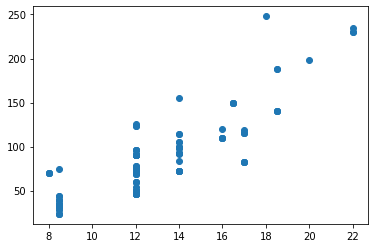

In [18]:

plt.scatter(viborka[0],viborka[1])


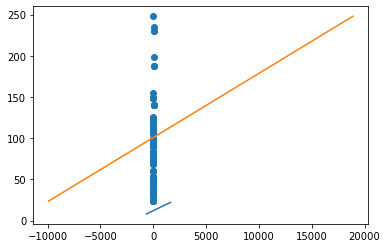

In [19]:
def lin_y(mid_x):
        return(mat_o1+Sxy*(sko1/sko2)*(mid_x-mat_o2))
    
def lin_x(mid_y):        
    return(mat_o2+Sxy*(sko2/sko1)*(mid_y-mat_o1))

Y_x=[]
X_y=[]
for i in range(0, len(mid_y)):
    X_y.append(lin_x(mid_y[i]))
    Y_x.append(lin_y(mid_x[i]))
    

plt.plot(X_y, mid_x)
plt.plot(Y_x, mid_y)
plt.scatter(viborka[0],viborka[1])
plt.show()

In [20]:
D_x=0
D_y=0
mean_x=[]
mean_y=[]
sum_meanx=0
sum_meany=0
k=0
D_comX=0
D_comY=0

#групповые средние
for i in range(0, len(countMy)):
    for j in range(0,8):
        sum_meanx+=M_xy[i][j]*mid_x[j]
        sum_meany+=m_xy[k]*mid_y[j]
        k+=1
    mean_x.append(sum_meanx/countMy[i])
    if countMx[i]!=0:
        mean_y.append(sum_meany/countMx[i])
    else:
        mean_y.append(0)
    sum_meanx=0
    sum_meany=0
#межгрупповая дисперсия    
for i in range(0,len(countMy)):
    D_x+=((mean_x[i]-mat_o2)**2)*countMy[i]
    D_y+=((mean_y[i]-mat_o1)**2)*countMx[i]
D_x=D_x/116
D_y=D_y/116

#Общее среднее квадратичное отклонение равно
for i in range(0,len(countMy)):
    D_comX+=((mean_x[i]-mat_o2)**2)*countMx[i]
    D_comY+=((mean_y[i]-mat_o1)**2)*countMy[i]
D_comX=D_comX/116
D_comY=D_comY/116
cor_yx=math.sqrt(D_y)/math.sqrt(D_comY)
cor_xy=math.sqrt(D_x)/math.sqrt(D_comX)
print(cor_yx, cor_yx)


0.8039247332528121 0.8039247332528121


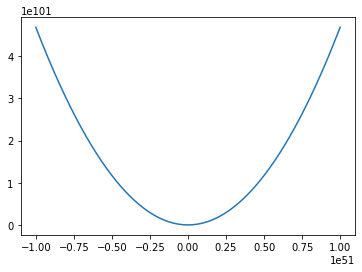

array([ 0.4690159 ,  1.41345377, -0.05722198])

In [21]:
#Метод наименьших квадратов для 𝑦 = 𝑎𝑥2 + 𝑏𝑥 + 𝑐.
x_mnk1=np.sum(mid_x)
y_mnk=np.sum(mid_y)
x_mnk2=np.sum([num**2 for num in mid_x])
x_mnk3=np.sum([num**3 for num in mid_x])
x_mnk4=np.sum([num**4 for num in mid_x])
xy_mnk=0
xy_mnk2=0
for i in range(0,len(mid_x)):
    xy_mnk+=mid_x[i]*mid_y[i]
    xy_mnk2+=(mid_x[i]**2)*mid_y[i]
    
MNK=np.array([[x_mnk4,x_mnk3,x_mnk2],[x_mnk3,x_mnk2,x_mnk1],[x_mnk2,x_mnk1,116]])
v_MNK=np.array([xy_mnk2,xy_mnk,y_mnk]) 
abc=np.linalg.solve(MNK, v_MNK)
def y_res(x):
    return abc[0]*(x**2)+abc[1]*x+abc[2]

x_gen=np.linspace(-10**51,10**51,700)
fig, ax = plt.subplots()
ax.plot(x_gen, y_res(x_gen))
plt.show()
abc

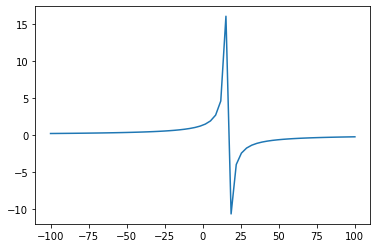

array([-0.04607259,  0.76524782])

In [22]:
#𝑦 =1/(𝑎𝑥 + 𝑏)
y1_mnk=np.sum([1/num for num in mid_x])
xdely_mnk=0
for i in range(0,len(mid_x)):
    xdely_mnk+=mid_x[i]/mid_y[i]
MNK_drob=np.array([[x_mnk2,x_mnk1],[x_mnk1,8]])
v_MNK_drob=np.array([xdely_mnk,y1_mnk]) 
ab=np.linalg.solve(MNK_drob, v_MNK_drob)
def y_drob(x):
    return 1/(ab[0]*np.array(x)+ab[1])

x_drob_gen=np.linspace(-100,100,60)
fig, ax = plt.subplots()
ax.plot(x_drob_gen, y_drob(x_drob_gen))
plt.show()
ab

In [23]:
#теоретический коэффициент детерминации 
D_y_res=np.sum([(y_res(mid_x[i])-mat_o1)**2 for i in range(0, len(mid_y))])/115
R_2_par=D_y_res/D1
D_y_drob=np.sum([(y_drob(mid_x[i])-mat_o1)**2 for i in range(0, len(mid_y))])/115
R_2_hyp=D_y_drob/D1

D_y_lin_y=np.sum([(lin_y(mid_x[i])-mat_o1)**2 for i in range(0, len(mid_y))])/115
R_2_lin_y=D_y_lin_y/D1

D_y_lin_x=np.sum([(lin_x(mid_y[i])-mat_o2)**2 for i in range(0, len(mid_x))])/115
R_2_lin_x=D_y_lin_x/D2
print(R_2_par, R_2_hyp,R_2_lin_y,R_2_lin_x)

0.23224427104094533 0.23660996979917465 3412.946338683052 4974.959069935746


In [24]:
#средняя квадратическая ошибка
ey_par=0
ey_hyp=0
ey_lin_y=0
ey_lin_x=0
for i in range(0,len(mid_y)):
    ey_lin_y+=(mid_y[i]-lin_y(mid_x[i]))**2
    ey_lin_x+=(mid_x[i]-lin_x(mid_y[i]))**2
    ey_par+=(mid_y[i]-y_res(mid_x[i]))**2
    ey_hyp+=(mid_y[i]-y_drob(mid_x[i]))**2
Se_par=ey_par/114
Se_hyp=ey_hyp/114
Se_lin_y=ey_lin_y/114
Se_lin_x=ey_lin_x/114
print(Se_par,Se_hyp,Se_lin_y,Se_lin_x)

5.6773630376388375 1655.2213198812888 7469393.931392456 53798.9725494696


In [25]:
Ay_par=np.sum([abs(ey_par/num) for num in mid_y])
Ay_hyp=np.sum([abs(ey_hyp/num) for num in mid_y])
Ay_lin_x=np.sum([abs(ey_lin_x/num) for num in mid_x])
Ay_lin_y=np.sum([abs(ey_lin_y/num) for num in mid_y])
print(Ay_par,Ay_hyp,Ay_lin_y,Ay_lin_x)

65.37037148984787 19058.572062630778 86004198.22760004 3638586.376230248


Лабораторная 6

In [26]:
#нормализация
norm_price=[]
norm_diameter=[]
for element in viborka[0]:
    norm_price.append((element-mat_o2)/Ds2)
for element in viborka[1]:
    norm_diameter.append((element-mat_o1)/Ds1)    
norm_viborka=[norm_price, norm_diameter]

In [27]:
#«грубая» верхняя оценка количества кластеров
k=math.floor(math.sqrt(116/2))
k

7

In [28]:
def kMeans(xy,M):
    M_k=[[],[],[],[],[],[],[]]
    lastM_K=[]
    lastM=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]] 
    
    while lastM!=M:
        lastM=[row[:] for row in M]
        lastM_K=[row[:] for row in M_k]
        M_k.clear()
        M_k=[[],[],[],[],[],[],[]]
        sm=0
        sm1=0
        check=0
        p=[]
        for i in range(0,len(xy[0])):
            for j in range (0,7):
                p.append(sqrt(((xy[0][i]-M[j][0])**2)+((xy[1][i]-M[j][1])**2)))
                
            M_k[p.index(min(p))].append(i)
            p.clear()
        for j in range (0,7):

            if len(M_k[j])!=0:
                for l in range (0,len(M_k[j])):
                    sm+=xy[0][M_k[j][l]]
                    sm1+=xy[1][M_k[j][l]]
                M[j][0]=sm/len(M_k[j])
                M[j][1]=sm1/len(M_k[j])
                sm=0                
                sm1=0
            else:
                M_k[j]=lastM_K[j]
                M[j]=lastM[j]
            
    return M, M_k
        

In [29]:
def kMedians(xy,M):
    M_k=[[],[],[],[],[],[],[]]
    lastM_K=[]
    lastM=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]] 
    
    while lastM!=M:
        lastM=[row[:] for row in M]
        lastM_K=[row[:] for row in M_k]
        M_k.clear()
        M_k=[[],[],[],[],[],[],[]]
        x_new=[]
        y_new=[]
        p=[]
        check=0
        for i in range(0,len(xy[0])):
            for j in range (0,7):
                p.append(sqrt(((xy[0][i]-M[j][0])**2)+((xy[1][i]-M[j][1])**2)))
                
            M_k[p.index(min(p))].append(i)
            p.clear()
        for j in range (0,7):
            if len(M_k[j])!=0 and check==0:
                for i in range (0,len(M_k[j])):
                    x_new.append(xy[0][M_k[j][i]])
                    y_new.append(xy[1][M_k[j][i]])
            else:
                M_k[j]=lastM_K[j]
                M[j]=lastM[j]
                check=1
            
    return M, M_k
        

In [30]:
from math import sqrt
K=[]
for i in range(0,7):
    K.append([random.choice(norm_diameter),random.choice(norm_price) ])
M, cluster_mean=kMeans(norm_viborka,K)
print(M,'\n', cluster_mean)


[[0.44690344336001736, 0.02176317189305995], [-0.07881894944621116, -0.00589517515356447], [-0.40677431735935954, -0.018850831826252835], [-0.002389906705275698, 0.5154759293782212], [0.055917466614812006, -0.3988238841978287], [-0.01706591223482158, 0.10404101326899871], [0.10404101326899867, 0.002027318546246098]] 
 [[0, 1, 2, 4, 5, 6, 10, 11, 15, 16, 20, 21, 23, 24, 29, 35, 41, 47, 79, 80, 84, 85, 87, 88, 93, 99, 104, 110], [8, 9, 13, 14, 18, 19, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 53, 56, 59, 62, 65, 68, 71, 74, 77, 82, 83, 90, 92, 94, 96, 98, 101, 103, 105, 107, 109, 111, 113, 115], [7, 12, 17, 25, 31, 37, 43, 49, 52, 55, 58, 61, 64, 67, 70, 73, 76, 81, 89, 95, 100, 106, 112], [], [], [], [3, 22, 27, 33, 39, 45, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 86, 91, 97, 102, 108, 114]]


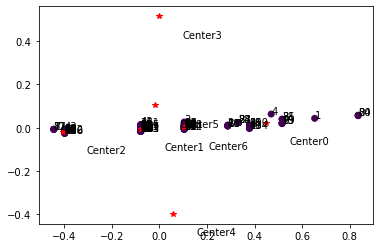

In [38]:
fig, ax = plt.subplots()
for i,coordinate in enumerate(M):
    ax.plot(coordinate[0],coordinate[1],'r*')
    ax.text(coordinate[0]+0.1,coordinate[1]-0.1,'Center'+str(i))
labels_=[0]*len(norm_viborka[0])

for cluster in cluster_mean:
    for index in cluster:
        ax.text(norm_viborka[0][index],norm_viborka[1][index],index)
scatter = ax.scatter(norm_viborka[0],norm_viborka[1],c=labels_)
    
plt.show()

In [39]:
M_med,cluster_med=kMedians(norm_viborka,K)
print(M,'\n', cluster_med)

In [40]:
sse = []
list_k = list(range(1, 7))

for k in list_k:
    km = kMeans(xy,k)
    sse.append(km.inertia_)


TypeError: 'dict' object is not callable

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'k')
plt.ylabel('WCSS');

In [ ]:
sse = []
list_k = list(range(1, 7))

for k in list_k:
    km = kMedians(xy,k)
    sse.append(km.inertia_)
sns.lineplot(x=range(1, len(cluster)+1), y=sse, marker='o')
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'k')
plt.ylabel('WCSS');

In [ ]:
#качество разбиения kMeans
new_clusters={}
for x,index_cluster in zip(norm_viborka,cluster_mean):
        new_clusters.setdefault(int(index_cluster),[])
        new_clusters[int(index_cluster)].append(x)
    new = [0]*k
    for key, value in new_clusters.items():
        new[key] = value
f=0
for cluster, centroid in zip(clusters,M):
    count=0
    if cluster!=0:
        for x in cluster:
            count+=np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
        f+=len(cluster)*count
f=f/len(norm_viborka)
print('Оценка качества разбиения для K-Means:',f)


In [ ]:
new_clusters={}
for x,index_cluster in zip(norm_viborka,cluster_med):
        new_clusters.setdefault(int(index_cluster),[])
        new_clusters[int(index_cluster)].append(x)
    new = [0]*k
    for key, value in new_clusters.items():
        new[key] = value
f=0
for cluster, centroid in zip(clusters,M):
    count=0
    if cluster!=0:
        for x in cluster:
            count+=abs(x[0]-y[0]) + abs(x[1]-y[1])
        f+=len(cluster)*count
f=f/len(norm_viborka)
print('Оценка качества разбиения для K-Medians:',f)
